---
# 3.4 Hermite Interpolation
---

## Hermite cubic interpolation

Suppose we want to find a polynomial $p(x)$ that satisfies

$$
\begin{align}
p(x_0) &= f(x_0), \quad p'(x_0) = f'(x_0),\\
p(x_1) &= f(x_1), \quad p'(x_1) = f'(x_1).\\
\end{align}
$$

We can use these four equations to solve for the four coefficients of a cubic polynomial

$$p(x) = c_0 + c_1x + c_2x^2 + c_3x^3.$$

Note that 

$$p'(x) = c_1 + 2c_2x + 3c_3x^2.$$

Using the monomial basis $\left\{1, x, x^2, x^3\right\}$ we have the linear system:

$$
\begin{bmatrix}
1 & x_0 & x_0^2 &   x_0^3 \\
1 & x_1 & x_1^2 &   x_1^3 \\
0 &   1 & 2 x_0 & 3 x_0^2 \\
0 &   1 & 2 x_1 & 3 x_1^2 \\
\end{bmatrix}
\begin{bmatrix}
c_0\\c_1\\c_2\\c_3\\
\end{bmatrix}
=
\begin{bmatrix}
f(x_0)\\f(x_1)\\f'(x_0)\\f'(x_1)\\
\end{bmatrix}.
$$


---

## Example

Suppose that 

$$
\begin{align}
f(0) &= 0, \quad f'(0) = 1,\\
f(1) &= 0, \quad f'(1) = 0.\\
\end{align}
$$

Then we need to solve

$$
\begin{bmatrix}
1 & 0 & 0 &   0 \\
1 & 1 & 1 &   1 \\
0 &   1 & 0 & 0 \\
0 &   1 & 2 & 3 \\
\end{bmatrix}
\begin{bmatrix}
c_0\\c_1\\c_2\\c_3\\
\end{bmatrix}
=
\begin{bmatrix}
0\\0\\1\\0\\
\end{bmatrix}.
$$

In [1]:
A = [
    1 0 0 0; 
    1 1 1 1;
    0 1 0 0;
    0 1 2 3;
]

b = [0, 0, 1, 0]

c = A\b

4-element Array{Float64,1}:
  0.0
  1.0
 -2.0
  1.0

Therefore, the polynomial is

$$p(x) = x - 2x^2 + x^3.$$

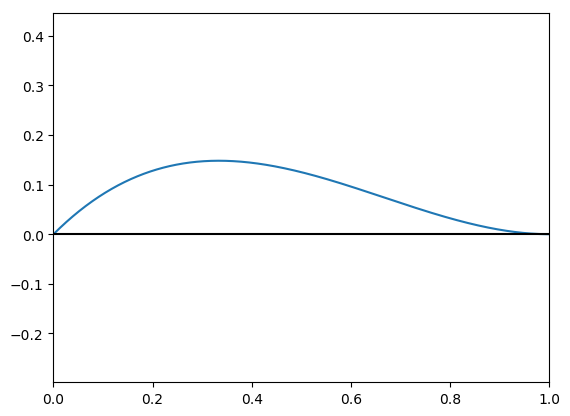

In [2]:
using PyPlot

x = linspace(0, 1, 1000)
y = x - 2x.^2 + x.^3

plot(x, y)
axis("equal")
axhline(color="k")
xlim(0, 1);

---

## Using divided differences

Another approach is to use Newton's form and divided differences.

We will use the convention that 

$$f[x_i,x_i] = f'(x_i).$$

Thus, we just need to complete the following table.

$$
\begin{array}{c|cccc}
x_i & f[\cdot] & f[\cdot,\cdot] & f[\cdot,\cdot,\cdot] & f[\cdot,\cdot,\cdot,\cdot]\\ 
\hline
x_0 & f(x_0) & & \\
x_0 & f(x_0) & f'(x_0) & \\
x_1 & f(x_1) & f[x_0,x_1] & f[x_0,x_0,x_1] \\
x_1 & f(x_1) & f'(x_1) & f[x_0,x_1,x_1] & f[x_0,x_0,x_1,x_1] \\
\end{array}
$$


Then 

$$p(x) = f(x_0) + f'(x_0)(x-x_0) + f[x_0,x_0,x_1](x-x_0)^2 + f[x_0,x_0,x_1,x_1](x-x_0)^2(x-x_1).$$


---

## Example

Again using

$$
\begin{align}
f(0) &= 0, \quad f'(0) = 1,\\
f(1) &= 0, \quad f'(1) = 0,\\
\end{align}
$$

we have the following table.

$$
\begin{array}{c|cccc}
x_i & f[\cdot] & f[\cdot,\cdot] & f[\cdot,\cdot,\cdot] & f[\cdot,\cdot,\cdot,\cdot]\\ 
\hline
0 & 0 & & \\
0 & 0 & 1 & \\
1 & 0 & f[x_0,x_1] & f[x_0,x_0,x_1] \\
1 & 0 & 0 & f[x_0,x_1,x_1] & f[x_0,x_0,x_1,x_1] \\
\end{array}
$$

$$
\begin{array}{c|cccc}
x_i & f[\cdot] & f[\cdot,\cdot] & f[\cdot,\cdot,\cdot] & f[\cdot,\cdot,\cdot,\cdot]\\ 
\hline
0 & 0 & & \\
0 & 0 & 1 & \\
1 & 0 & 0 & \frac{0-1}{1-0} \\
1 & 0 & 0 & \frac{0-0}{1-0} & f[x_0,x_0,x_1,x_1] \\
\end{array}
$$

$$
\begin{array}{c|cccc}
x_i & f[\cdot] & f[\cdot,\cdot] & f[\cdot,\cdot,\cdot] & f[\cdot,\cdot,\cdot,\cdot]\\ 
\hline
0 & 0 & & \\
0 & 0 & 1 & \\
1 & 0 & 0 & -1 \\
1 & 0 & 0 & 0 & \frac{0-(-1)}{1-0} \\
\end{array}
$$

$$
\begin{array}{c|cccc}
x_i & f[\cdot] & f[\cdot,\cdot] & f[\cdot,\cdot,\cdot] & f[\cdot,\cdot,\cdot,\cdot]\\ 
\hline
0 & 0 & & \\
0 & 0 & 1 & \\
1 & 0 & 0 & -1 \\
1 & 0 & 0 & 0 & 1 \\
\end{array}
$$

Thus,

$$
\begin{align}
p(x) 
&= 0 + 1\cdot(x-0) + (-1)\cdot(x-0)^2 + 1\cdot(x-0)^2(x-1)\\
&= x - x^2 + x^2(x-1)\\
&= x - 2x^2 + x^3,\\
\end{align}
$$

which agrees with our solution above.

---

## An interactive Hermite cubic

In [3]:
using PyPlot

function hermite(x0, x1, f0, f1, fp0, fp1)
    
    A = [
        1 x0  x0^2  x0^3;
        1 x1  x1^2  x1^3;
        0  1 2x0   3x0^2;
        0  1 2x1   3x1^2;
    ]
    b = [f0, f1, fp0, fp1]
    c = A\b
    
    xx = linspace(x0, x1, 1000)
    #yy = c[1] + c[2]*xx + c[3]*xx.^2 + c[4]*xx.^3
    yy = ((c[4]*xx + c[3]).*xx + c[2]).*xx + c[1]
        
    h = .1
    
    plot(xx, yy, "b")
    plot([x0, x0+h], [f0, f0+h*fp0], "r")
    plot([x1, x1+h], [f1, f1+h*fp1], "r")
    plot([x0,x1,x0+h,x1+h], [f0,f1,f0+h*fp0,f1+h*fp1], "ro")
    #(x0 < x1) ? xlim(x0, x1) : xlim(x1, x0)
    
    return nothing
end

hermite (generic function with 1 method)

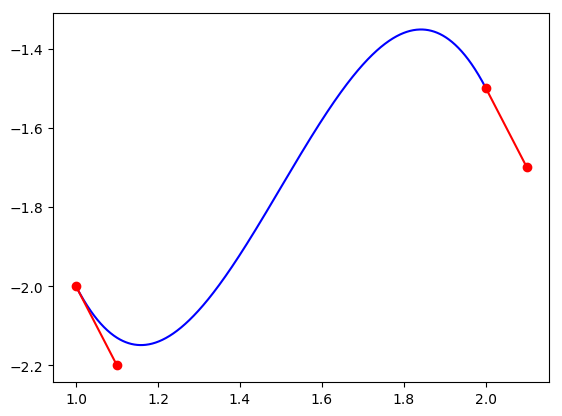

In [8]:
x0, x1, f0, f1, fp0, fp1 = 1., 2., -2., -1.5, -2., -2.
hermite(x0, x1, f0, f1, fp0, fp1)

---